In [ ]:
3-1: The Graphs of Odds, Logit and Sigmoid

Code.3-1-1: The Graphs of Odds and Logit

Text(0.5, 0, 'Probability')

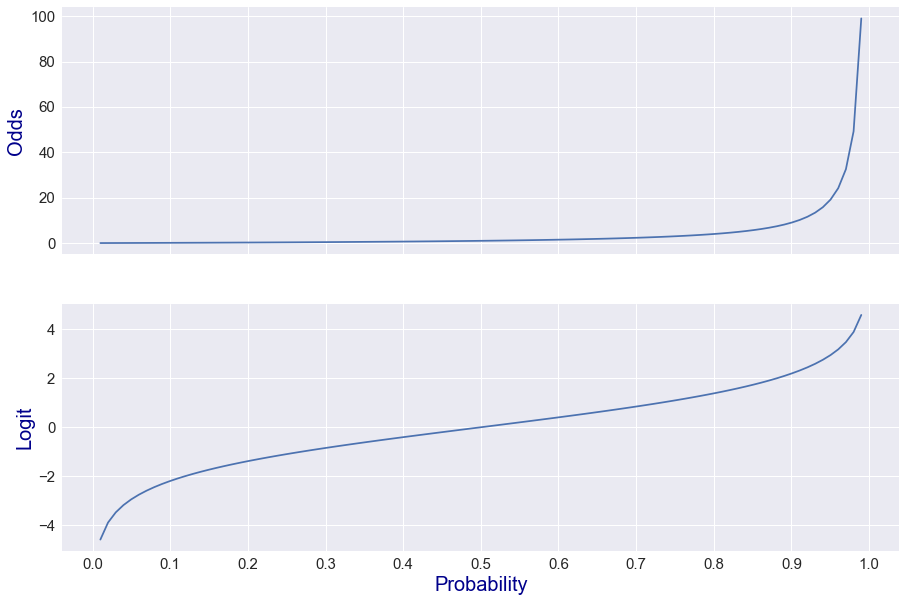

In [11]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('seaborn')

p_np = np.linspace(0.01, 0.99, 100)
p_tf = tf.linspace(0.01, 0.99, 100)

odds_np = p_np / (1-p_np)
odds_tf = p_tf / (1-p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2, 1, figsize=(15, 10),
                         sharex=True)
axes[0].plot(p_np, odds_np)
axes[1].plot(p_tf, logit_tf)

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probability', fontsize=20, color='darkblue')

Code.3-1-2: The Graphs of Sigmoid

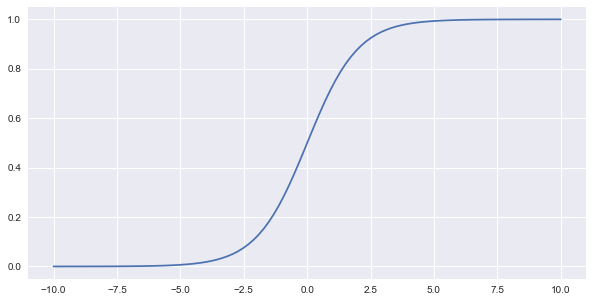

In [12]:
import tensorflow as tf

from tensorflow.keras.layers import Activation

x = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x.numpy(), sigmoid.numpy())

3-2: Logistic Regression Models

Code.3-2-1: Single-variate Logistic Regression Models

(100, 1)


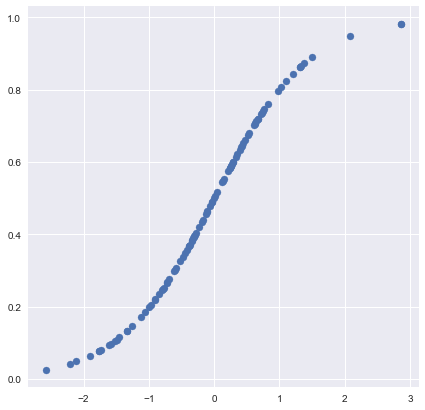

In [17]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100, 1))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)

fig, ax  = plt.subplots(figsize=(7, 7))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

Code.3-2-2: Multi-variate Logistic Regression Models

In [19]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100, 5))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)


(100, 1)


3-3: Binary Classifier with Dense Layers

Code.3-3-1: Binary Classifier with Dense Layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(unuts=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

3-4: Softmax Layers

Code.3-4-1: IO of Softmax 

In [23]:
import tensorflow as tf

from tensorflow.keras.layers import Activation

logit = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)

softmax_value = Activation('softmax')(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print("Logits: \n", logit.numpy())
print("Probabilities: \n", softmax_value.numpy())
print("Sum of softmax values: \n", softmax_sum)

Logits: 
 [[ 4.79821     6.189497    5.002739   -0.9345703   9.806091  ]
 [-2.4216747   8.665884   -7.960236   -1.0822849   5.8672285 ]
 [ 1.1640854  -9.862402   -2.9225898   3.682497    7.438427  ]
 [-2.0480132   0.05892277 -9.205236    0.6525421   8.74855   ]
 [ 3.1894398  -3.562591   -8.292091   -0.93515205  8.037182  ]
 [-0.54831505  6.7609177  -1.2685986  -1.0932112  -0.89448166]
 [ 8.215092   -2.9809332   2.5832367   6.1765175  -3.543167  ]
 [-8.905323   -7.788272   -7.034507    6.3727875  -9.777306  ]]
Probabilities: 
 [[6.4169341e-03 2.5796203e-02 7.8732371e-03 2.0778427e-05 9.5989281e-01]
 [1.4422254e-05 9.4253761e-01 5.6710924e-08 5.5045613e-05 5.7392884e-02]
 [1.8375512e-03 2.9888003e-08 3.0861625e-05 2.2801938e-02 9.7532958e-01]
 [2.0459618e-05 1.6823965e-04 1.5942454e-08 3.0460287e-04 9.9950671e-01]
 [7.7839401e-03 9.0955618e-06 8.0321890e-08 1.2586705e-04 9.9208099e-01]
 [6.6809001e-04 9.9814677e-01 3.2510213e-04 3.8742676e-04 4.7260328e-04]
 [8.8197601e-01 1.2108349e-05 

Code.3-4-2: Softmax in Dense Layers

In [25]:
import tensorflow as tf

from tensorflow.keras.layers import Dense

logit = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
dense = Dense(units=8, activation='softmax')

Y = dense(logit)
print(tf.reduce_sum(Y, axis=1))

tf.Tensor(
[1.0000001  0.99999994 1.         1.         0.9999999  1.0000001
 1.         0.99999994], shape=(8,), dtype=float32)


3-5: Multi-class Classifiers

Code.3-5-1: Multi-class Classifiers

In [33]:
import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense

class TestModel(Model):
  def __init__(self):
    super(TestModel, self).__init__()

    self.dense1 = Dense(units=8, activation='relu')
    self.dense2 = Dense(units=5, activation='relu' )
    self.dense3 = Dense(units=3, activation='softmax')
    
  def call(self, x):
    print("X: {}\n{}\n".format(x.shape, x.numpy()))
    
    x = self.dense1(x)
    print("A1: {}\n{}\n".format(x.shape, x.numpy()))
    
    x = self.dense2(x)
    print("A2: ()\n{}\n".format(x.shape, x.numpy()))
    
    
    x = self.dense3(x)
    print("Y: {}\n{}\n".format(x.shape, x.numpy()))
    print("Sum of vectors: {}\n".format(tf.reduce_sum(x, axis=1)))
    return x


model = TestModel()
X = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
Y = model(X)

X: (8, 5)
[[ 3.7466888   6.28187    -0.7487011   0.8954315   9.6718445 ]
 [-2.693534   -9.230301   -9.678454    7.9590034  -7.226906  ]
 [ 4.6088047   7.979267    4.2273445   4.0765457   8.25304   ]
 [ 7.7051773  -1.1022806  -8.797307    9.91544     2.045433  ]
 [ 7.5617046   0.71066856 -7.1939826  -1.9628191   6.634907  ]
 [ 3.7787838   8.772198    0.24322987  1.8248415   5.0102377 ]
 [-3.0641198   6.916788    8.265289   -9.715641    8.267246  ]
 [ 6.728346   -0.16131401 -6.1607456   8.842747   -8.196762  ]]

A1: (8, 8)
[[ 0.9914892   2.2321682   0.          0.          1.396578    0.
   5.41163     4.744904  ]
 [ 0.02710972  0.          2.6276815   9.812823    0.          0.5994391
   0.          0.        ]
 [ 4.6464653   4.4661856   0.          0.          3.6715653   0.
   7.312147    4.1464143 ]
 [ 0.          0.          0.          3.3635395   1.313129    0.
   8.622256    0.        ]
 [ 0.          0.          3.0550873   0.          0.11026478  0.
   4.390251    0.717635  ]
 